# Дипломная работа по курсу "Python для анализа данных"
Сулейманова Наиля

### Задание
Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен тут -https://drive.google.com/file/d/1INgo03nal-vwFJe7Lec5vOUtOwfJdUr1/view?usp=sharing

### Признаки:
* satisfaction_level​ - Уровень удовлетворенности работой
* Last_evaluation ​- Время с момента последней оценки в годах
* number_projects​ - Количество проектов, выполненных за время работы
* average_monthly_hours​ - Среднее количество часов на рабочем месте в месяц
* time_spend_company​ - Стаж работы в компании в годах
* work_accident​ - Происходили ли несчастные случаи на рабочем месте с сотрудником
* left​ - уволился ли сотрудник
* promotion_last_5years​ - повышался ли сотрудник за последние пять лет
* department ​- отдел в котором работает сотрудник
* salary​ - относительный уровень зарплаты

Требуется выполнить следующее задание:

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats 
import matplotlib.pyplot as plt  
import seaborn as sns

In [33]:
from scipy.stats import f_oneway
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [193]:
#увеличим дефолтный размер графиков
from pylab import rcParams
rcParams['figure.figsize'] = 13,6

In [3]:
# Загрузите файл HR.csv в pandas dataframe
df = pd.read_csv('C:\\Users\\HP\\Desktop\\DataAnalitics\\Python\\Notebook\\dop material\\HR.csv', sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


<div class="alert alert-info">
Рассчитайте основные статистики для переменных (среднее, медиана, мода, мин/макс, сред.отклонение).
</div>

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<div class="alert alert-info">
Рассчитайте и визуализировать корреляционную матрицу для количественных переменных.

Определите две самые скоррелированные и две наименее скоррелированные переменные.
</div>

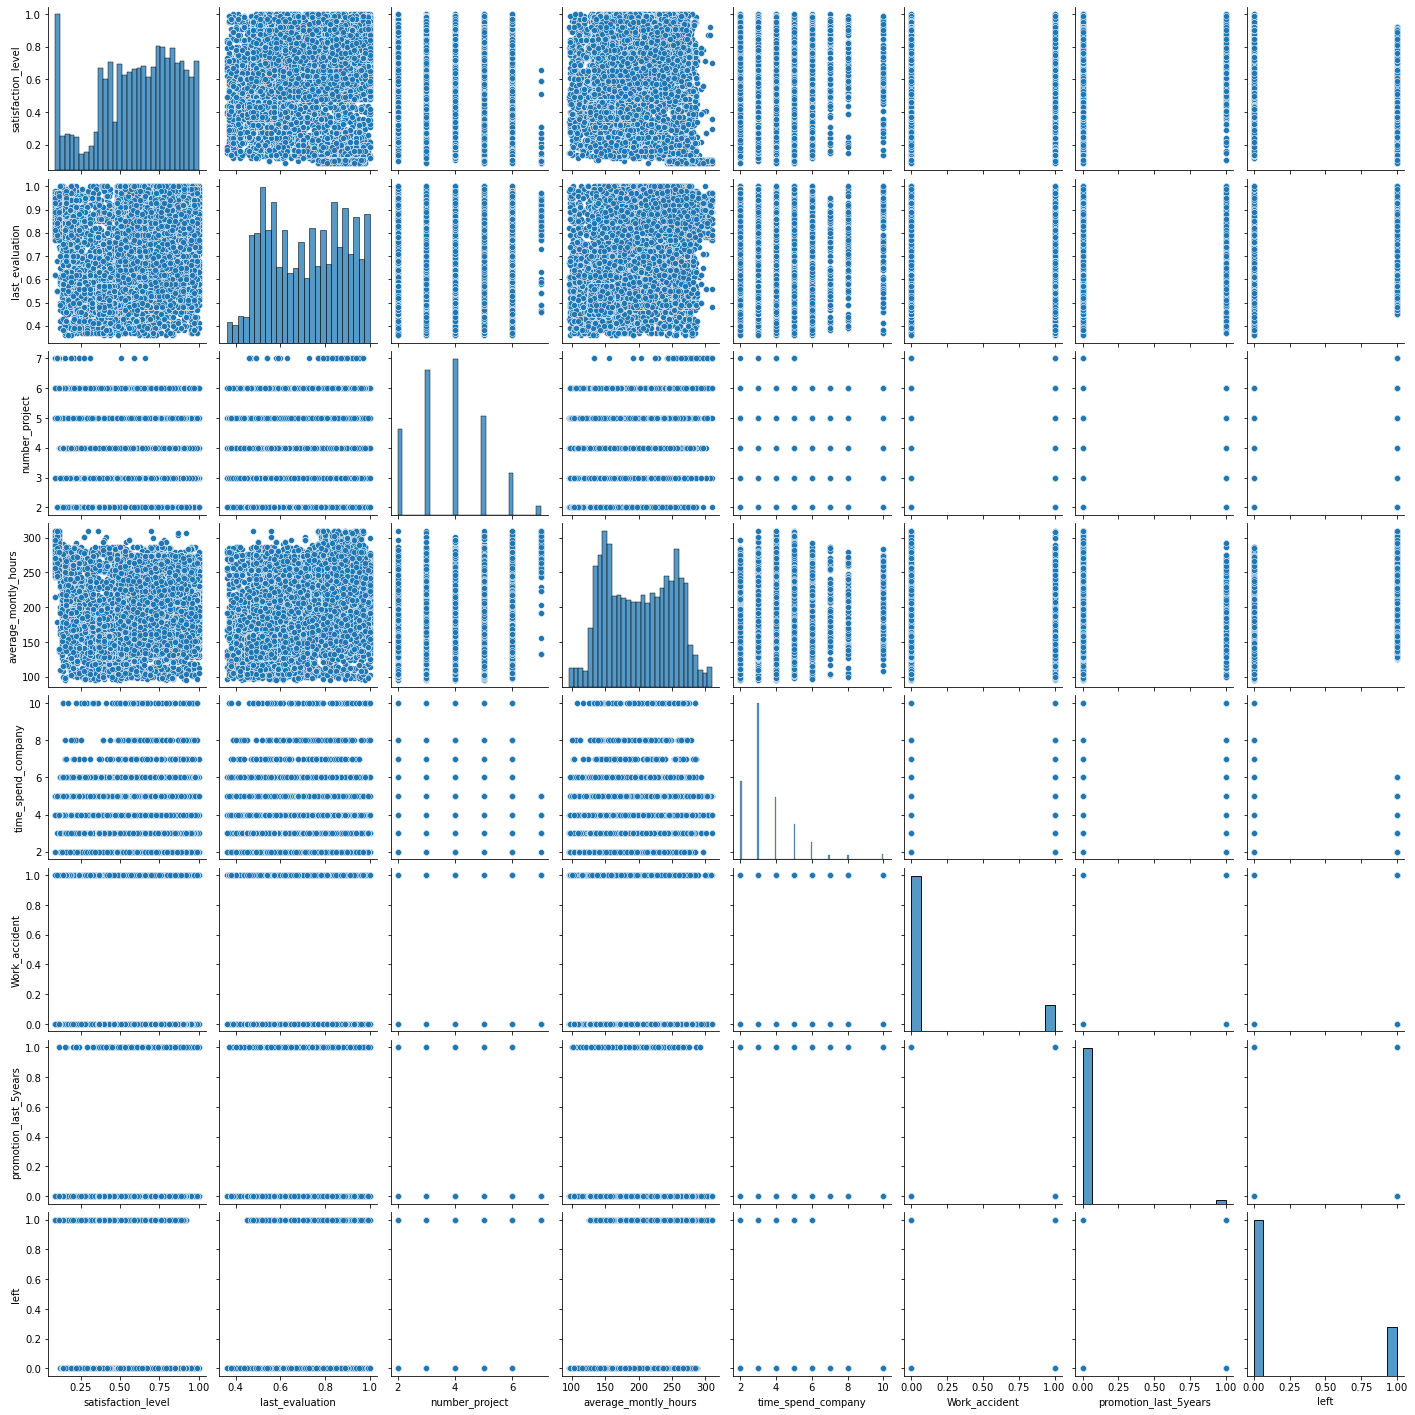

In [188]:
# pair plot (scatter plot matrix) поможет нам посмотреть на одной картинке, как связаны между собой различные признаки в наборе данных
sns.pairplot(df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']])

In [190]:
# коэффициент корреляции Пирсона
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']].corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605,-0.388375
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684,0.006567
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064,0.023787
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544,0.071287
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433,0.144822
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245,-0.154622
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000,-0.061788
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788,1.000000


In [189]:
# коэффициент корреляции Спирмена
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']].corr(method='spearman')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.162407,0.005786,0.062000,-0.139428,0.056333,0.022306,-0.365842
last_evaluation,0.162407,1.000000,0.350399,0.342061,0.161154,-0.005767,-0.007167,-0.002440
number_project,0.005786,0.350399,1.000000,0.397855,0.251971,0.002328,-0.002960,-0.019544
average_montly_hours,0.062000,0.342061,0.397855,1.000000,0.168750,-0.006063,-0.002951,0.046455
time_spend_company,-0.139428,0.161154,0.251971,0.168750,1.000000,-0.027277,0.035205,0.268876
Work_accident,0.056333,-0.005767,0.002328,-0.006063,-0.027277,1.000000,0.039245,-0.154622
promotion_last_5years,0.022306,-0.007167,-0.002960,-0.002951,0.035205,0.039245,1.000000,-0.061788
left,-0.365842,-0.002440,-0.019544,0.046455,0.268876,-0.154622,-0.061788,1.000000


In [191]:
# коэффициент корреляции Кендалла
df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']].corr(method='kendall')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,left
satisfaction_level,1.000000,0.113865,0.022077,0.051126,-0.110005,0.046298,0.018332,-0.300675
last_evaluation,0.113865,1.000000,0.266267,0.235374,0.118842,-0.004749,-0.005903,-0.002010
number_project,0.022077,0.266267,1.000000,0.306987,0.195025,0.002096,-0.002666,-0.017601
average_montly_hours,0.051126,0.235374,0.306987,1.000000,0.119466,-0.004966,-0.002417,0.038045
time_spend_company,-0.110005,0.118842,0.195025,0.119466,1.000000,-0.024839,0.032059,0.244851
Work_accident,0.046298,-0.004749,0.002096,-0.004966,-0.024839,1.000000,0.039245,-0.154622
promotion_last_5years,0.018332,-0.005903,-0.002666,-0.002417,0.032059,0.039245,1.000000,-0.061788
left,-0.300675,-0.002010,-0.017601,0.038045,0.244851,-0.154622,-0.061788,1.000000


<AxesSubplot:>

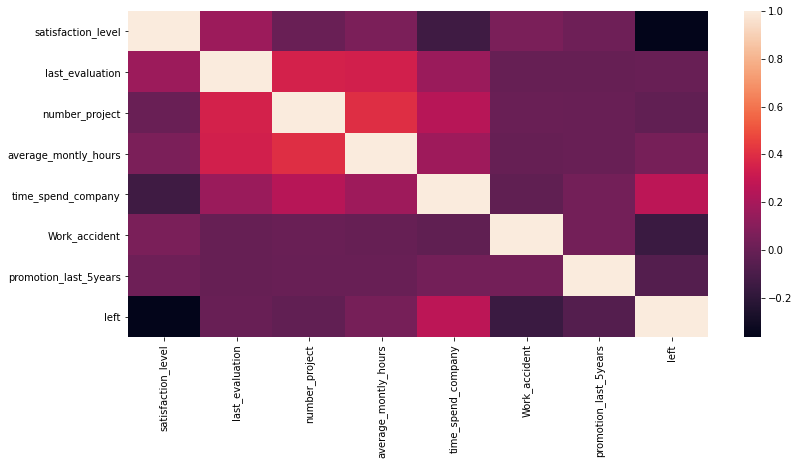

In [194]:
# так как для нашей выборки лучше всего подходит коэффициент Спирмена (есть дискретные значения), 
# то построим тепловую карту на основе матрицы корреляций Спирмена
matrix_corr = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'left']].corr(method='spearman')
sns.heatmap(matrix_corr)

### Вывод:
Из коэффициентов корреляции и визуализация видно, что связь между переменными слабая, либо не носит линейного характера.
* две самые скоррелированные переменные - average_montly_hours и number_project. 
* есть обратная коррелияция у переменных - satisfaction_level и left.
* две наименее скоррелированные переменные - Work_accident и number_project.

<div class="alert alert-info">
Рассчитайте сколько сотрудников работает в каждом департаменте.
</div>

In [18]:
df_employees = df.groupby('department').count()
df_employees['employees'] = df_employees['satisfaction_level'] 
df_employees[['employees']]

,employees
department,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


<div class="alert alert-info">
    Показать распределение сотрудников по зарплатам.
    </div>

In [22]:
df_salary = df.groupby('salary').count()
df_salary['employees'] = df_salary['satisfaction_level'] 
df_salary[['employees']]

,employees
salary,
high,1237
low,7316
medium,6446


<div class="alert alert-info">
Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности
</div>

In [25]:
df_departments = df.groupby(['department', 'salary']).count()
df_departments['employees'] = df_departments['satisfaction_level'] 
df_departments[['employees']]

employees
department  salary           
IT          high           83
            low           609
            medium        535
RandD       high           51
            low           364
            medium        372
accounting  high           74
            low           358
            medium        335
hr          high           45
            low           335
            medium        359
management  high          225
            low           180
            medium        225
marketing   high           80
            low           402
            medium        376
product_mng high           68
            low           451
            medium        383
sales       high          269
            low          2099
            medium       1772
support     high          141
            low          1146
            medium        942
technical   high          201
            low          1372
            medium       1147

<div class="alert alert-info">
Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом
</div>

H0: сотрудники с высоким окладом и с низким окладом проводят на работе одинаковое кол-во времени.

H1: сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

За alpha здесь и далее будем принимать 0.05

In [28]:
### разобьем датафрейм на две выборки

df_high = df[(df['salary'] == 'high')]
df_high.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
72,0.45,0.49,2,149,3,0,1,0,product_mng,high
111,0.09,0.85,6,289,4,0,1,0,hr,high
189,0.44,0.51,2,156,3,0,1,0,technical,high
267,0.45,0.53,2,129,3,0,1,0,technical,high
306,0.37,0.46,2,149,3,0,1,0,marketing,high


In [29]:
df_low = df[(df['salary'] == 'low')]
df_low.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low


In [30]:
# используем t-test Стьюдента
result = stats.ttest_ind(df_high['average_montly_hours'], df_low['average_montly_hours'], equal_var=False)

print(df_high['average_montly_hours'].mean())
print(df_low['average_montly_hours'].mean())
print(result)

alpha = 0.05
if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу, сотрудники с высоким и низким окладом проводят на работе разное кол-во времени')
else:
    print('Не отвергаем нулевую гипотезу, сотрудники с высоким и низким окладом проводят на работе одинаковое кол-во времени.')

199.86742118027485
200.9965828321487
Ttest_indResult(statistic=-0.7624331665385475, pvalue=0.4459045542257889)
Не отвергаем нулевую гипотезу, сотрудники с высоким и низким окладом проводят на работе одинаковое кол-во времени.


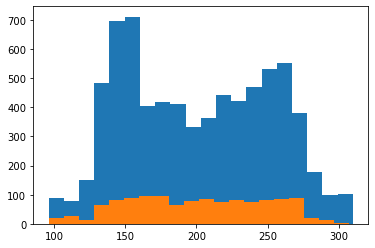

In [32]:
# построим гистограмму
plt.hist(df_low['average_montly_hours'], bins=20);
plt.hist(df_high['average_montly_hours'], bins=20);


In [34]:
# проведем дисперсионный анализ
F, p = f_oneway(df_high['average_montly_hours'], df_low['average_montly_hours'])  

alpha = 0.05  # Уровень значимости
print(F, p)   # Смотрим на результаты ДА

if p > alpha:
    print('Одинаковое распределение (не отвергаем H0)')
else:
    print('Разное распределение (отклоняем H0)')

0.5312486194509748 0.46610234782779036
Одинаковое распределение (не отвергаем H0)


### Выводы:
После проведенного теста Стьюдента и Дисперсионного анализа видим, что выборки имеют одинаковое распределение и мы не можем отвергнуть нулевую гипотезу. Различие - статистически незначимое, а по Среднему значению и значению Статистики можем даже судить о том, что сотрудники с низким окладом проводят немного больше времени на работе, чем сотрудники с высоким окладом.


<div class="alert alert-info">
Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
* Доля сотрудников с повышением за последние 5 лет
* Средняя степень удовлетворенности
* Среднее количество проектов
</div>

In [71]:
df_left = df[['left', 'satisfaction_level', 'number_project', 'promotion_last_5years']].groupby('left').agg({'satisfaction_level': 'mean', 'number_project': 'mean', 'promotion_last_5years': ['sum', 'count']})
df_left['promotion_share'] = (df_left['promotion_last_5years']['sum'] / df_left['promotion_last_5years']['count']) * 100
df_left[['satisfaction_level', 'number_project', 'promotion_share']]

,satisfaction_level,number_project,promotion_share
,mean,mean,
left,,,
0,0.666810,3.786664,2.625131
1,0.440098,3.855503,0.532064


<div class="alert alert-info">
* Разделить данные на тестовую и обучающую выборки
* Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary)
* Оценить качество модели на тестовой выборки
</div>

In [74]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

In [177]:
# Разделяем DF на данные для обучения и тестирования
X, y = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years']], df['left']

In [178]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [179]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [180]:
# строим модель LDA
lda = LinearDiscriminantAnalysis()

In [181]:
# обучаем данные
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [182]:
# делаем прогноз на тестовой выборке
lda.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [183]:
# смотрим разницу факта и прогноза
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,left,Unnamed 0
5562,0.0,NaN
10707,0.0,NaN
14627,1.0,NaN
1982,1.0,0.0
12103,1.0,NaN
...,...,...
7723,0.0,NaN
14167,0.0,NaN
14472,1.0,NaN
12183,1.0,NaN


In [184]:
# расчет точности - отношение верных прогнозов к общему количеству позиций
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.771

In [185]:
# коэффициенты дискриминатных линий
lda.coef_

array([[-4.47198415e+00,  6.63127108e-01, -2.58211651e-01,
         4.42761456e-03,  2.24323522e-01, -1.05595267e+00,
        -1.07448308e+00]])

In [186]:
# центроиды
lda.means_

array([[6.64767060e-01, 7.14980315e-01, 3.78313648e+00, 1.98990376e+02,
        3.37357830e+00, 1.73447069e-01, 2.72309711e-02],
       [4.39947461e-01, 7.15926445e-01, 3.82697023e+00, 2.06725744e+02,
        3.86409807e+00, 4.90367776e-02, 5.95446585e-03]])

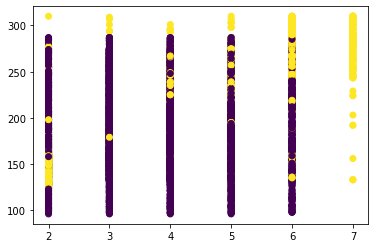

In [187]:
# визуализируем дискриминантную линию только по 2 признакам
plt.scatter(X_train['number_project'], X_train['average_montly_hours'], c=y_train)
plt.show()

Загрузить jupyter notebook с решение на github и прислать ссылку